In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.shape,test_data.shape

((1460, 81), (1459, 80))

In [44]:
train_null=train_data.isnull().sum()
test_null=test_data.isnull().sum()
train_null

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [45]:
threshold = 0.5  # 80%
train_data = train_data.loc[:, train_data.isnull().mean() <= threshold]
test_data = test_data.loc[:, test_data.isnull().mean() <= threshold]

In [46]:
train_data['LotAreaBin'] = pd.qcut(train_data['LotArea'], q=10, duplicates='drop')

train_data['LotFrontage'] = train_data.groupby(['BldgType', 'MSZoning', 'LotAreaBin'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

train_data.drop(columns='LotAreaBin', inplace=True)

test_data['LotAreaBin'] = pd.qcut(test_data['LotArea'], q=10, duplicates='drop')

test_data['LotFrontage'] = test_data.groupby(['BldgType', 'MSZoning', 'LotAreaBin'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

test_data.drop(columns='LotAreaBin', inplace=True)

C:\Users\zyzai\AppData\Local\Temp\ipykernel_22776\3085647462.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data['LotFrontage'] = train_data.groupby(['BldgType', 'MSZoning', 'LotAreaBin'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
c:\Users\zyzai\miniconda3\envs\perpro\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\zyzai\miniconda3\envs\perpro\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\zyzai\miniconda3\envs\perpro\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

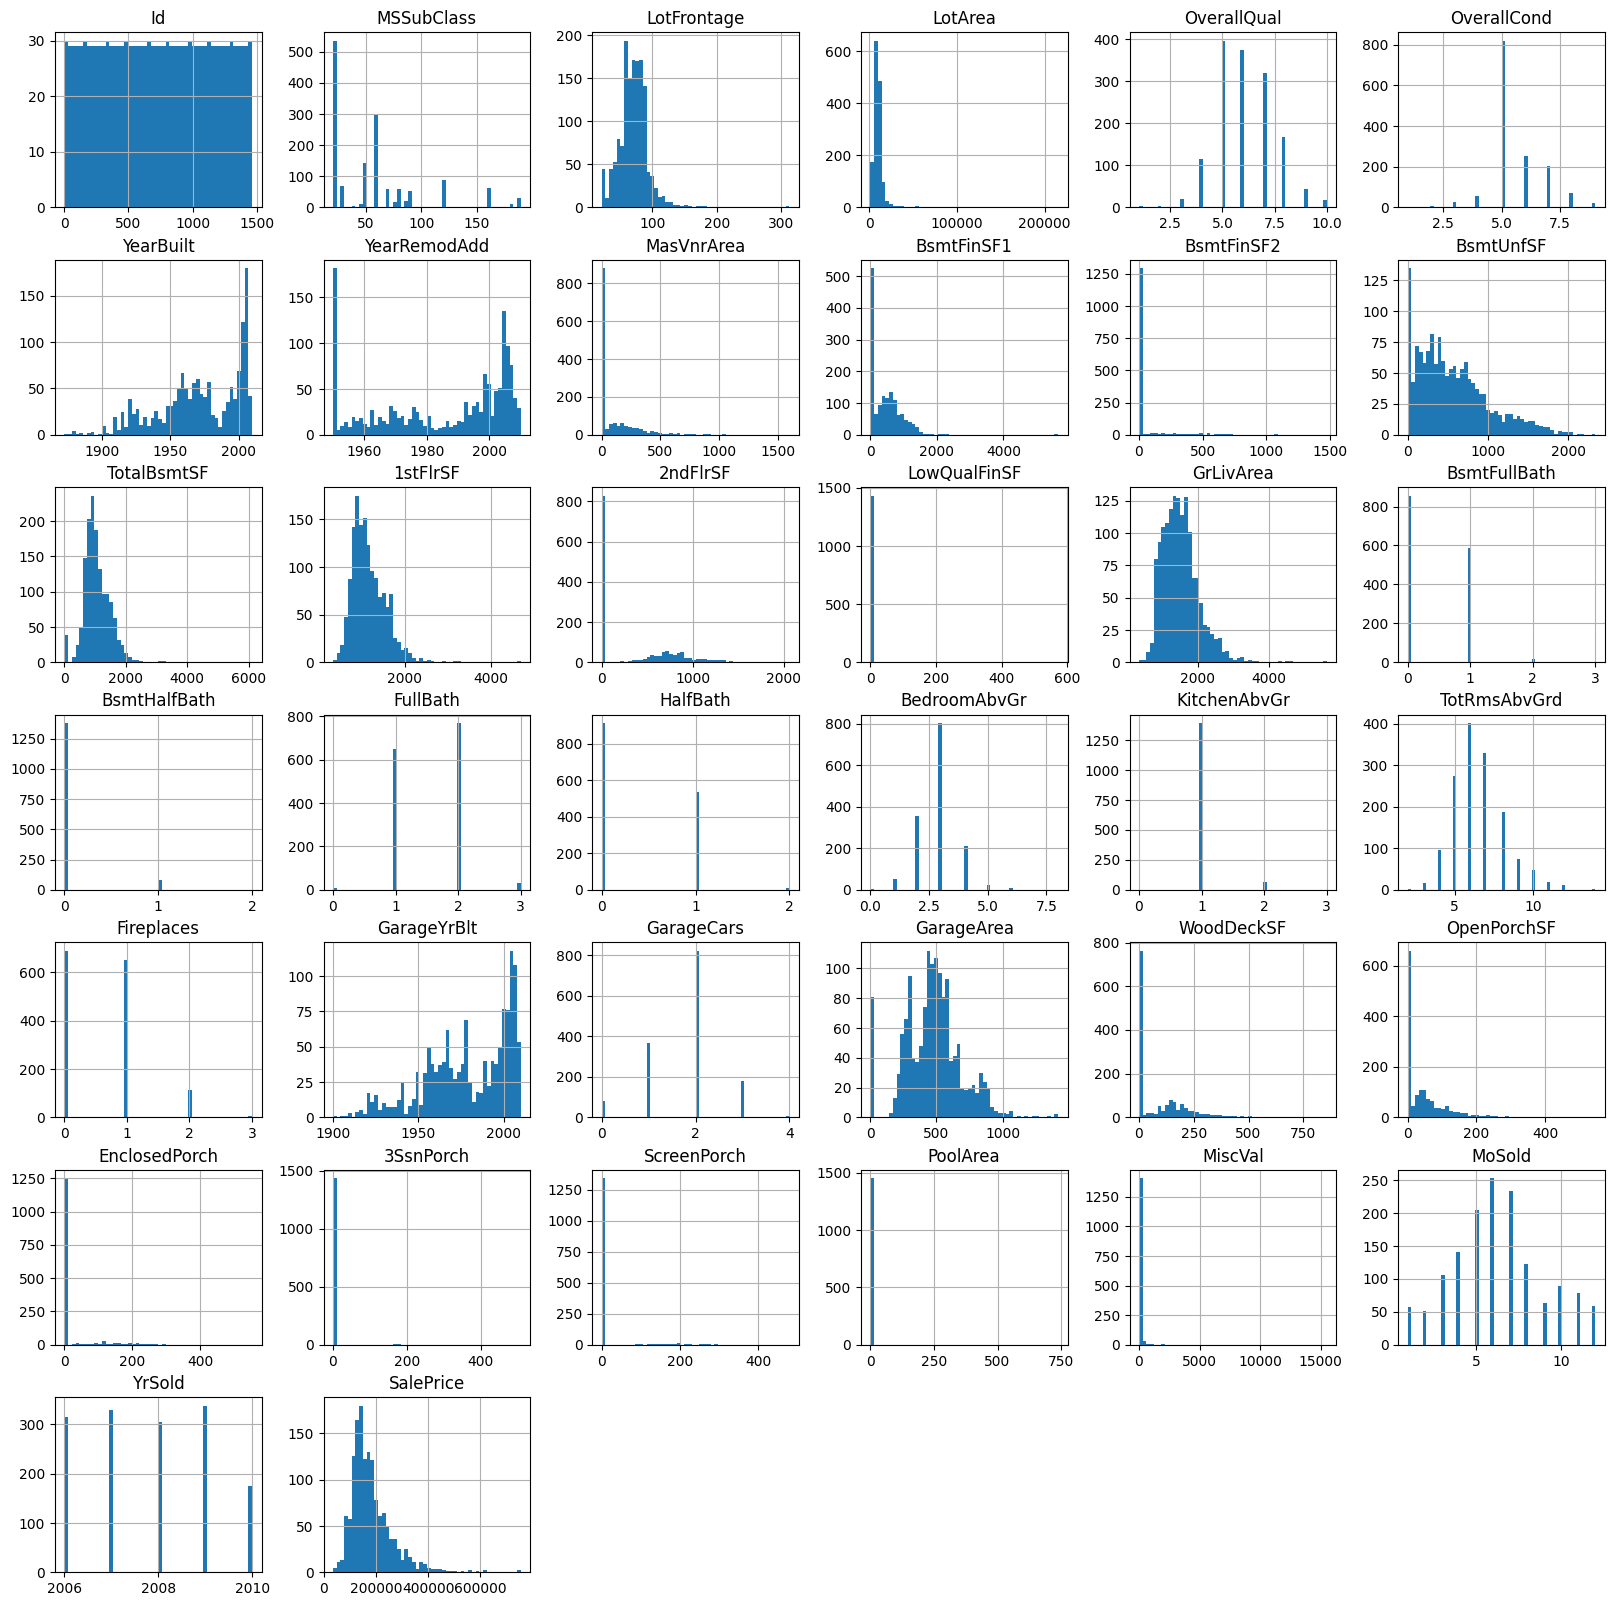

In [47]:
train_data.hist(figsize=(20, 20), bins=50)

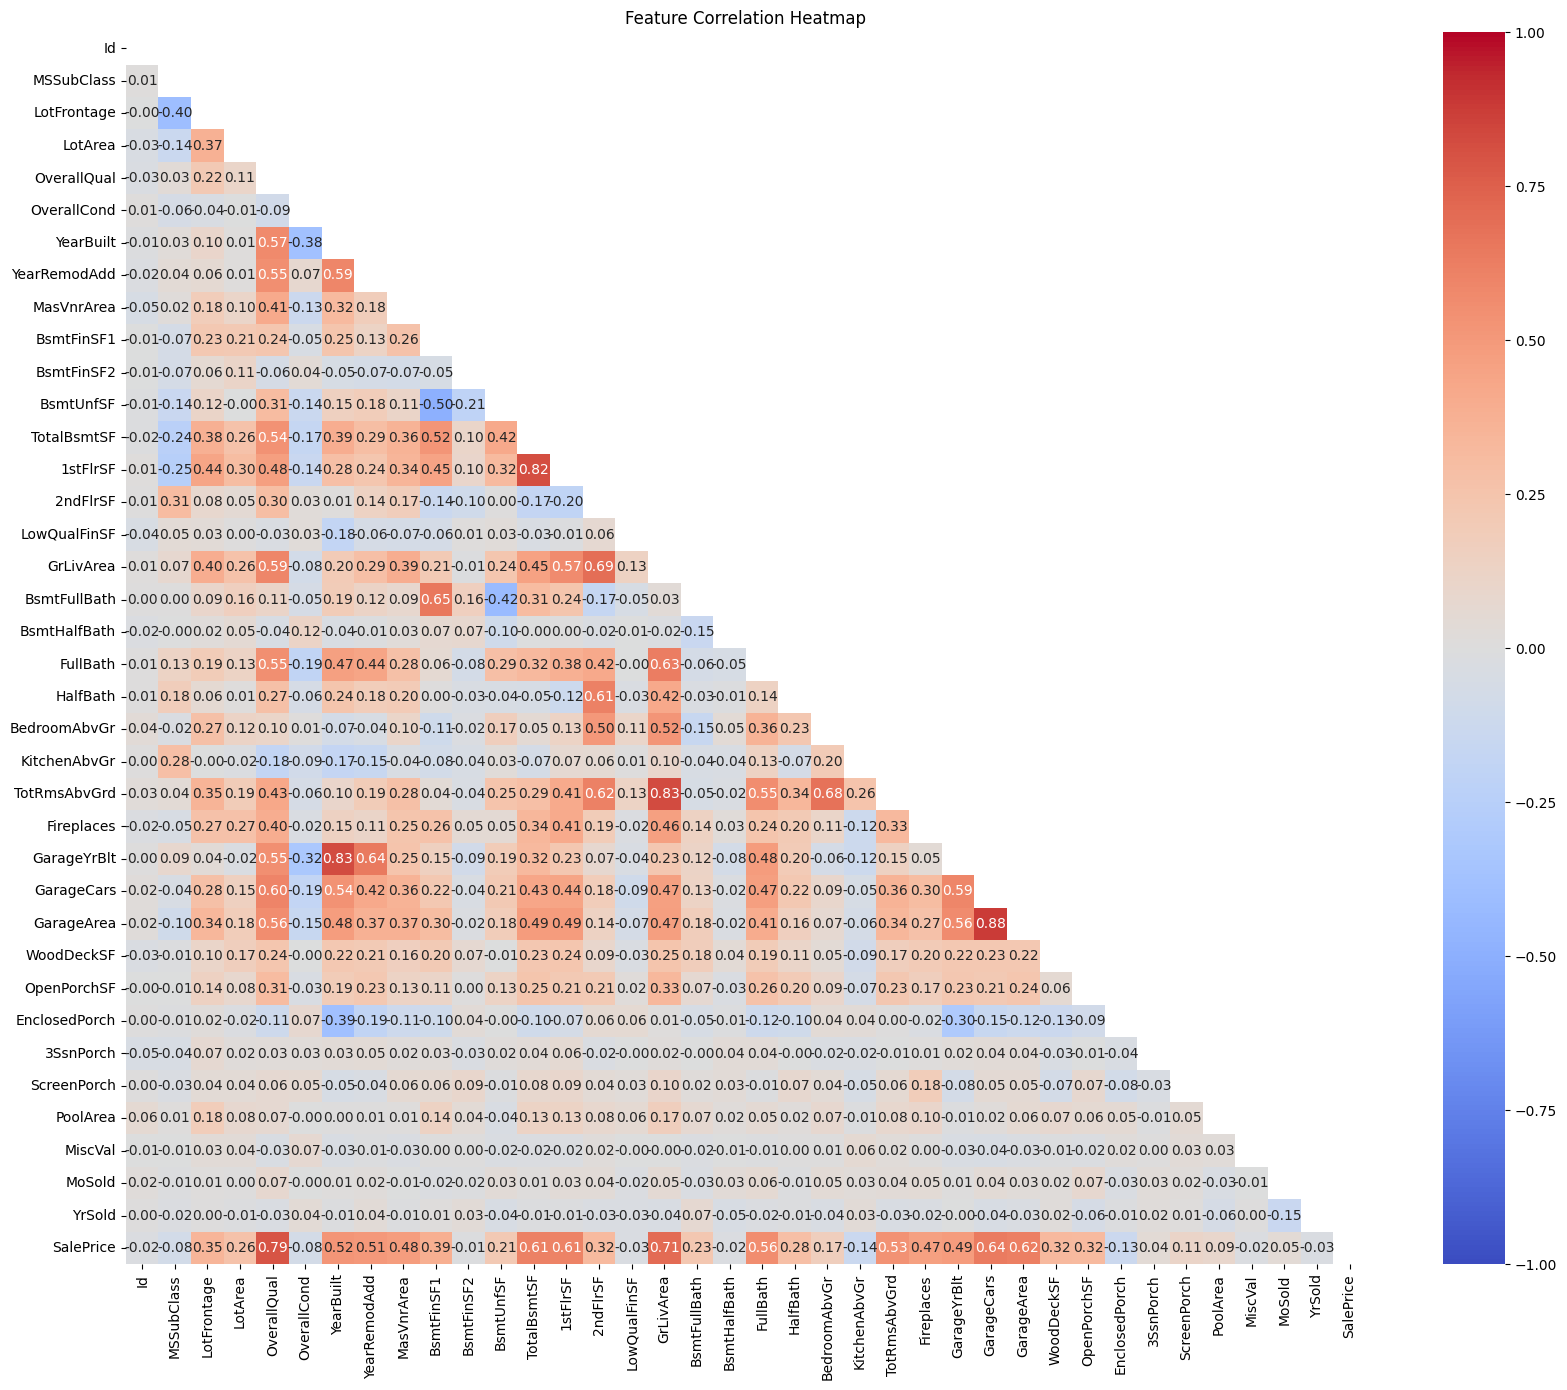

In [48]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
corr_df = train_data[numeric_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_df))  # Hide upper triangle for clarity
)
plt.title("Feature Correlation Heatmap")
plt.show()



In [49]:
numeric_data = train_data.select_dtypes(include=['int64', 'float64'])

correlation = numeric_data.corr()['SalePrice']

relevant_features = correlation[abs(correlation) >= 0.2].drop('SalePrice').index.tolist()

print(relevant_features)
# feat=relevant_features+['MSZoning','LotConfig','Neighborhood','BldgType','HouseStyle','OverallCond','MasVnrType']
train_x=train_data[relevant_features]#train[feat]
test_x=test_data[relevant_features]#test[feat]

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


In [50]:
train_x['LotFrontage'].fillna(train_x['LotFrontage'].mean(), inplace=True)
train_x['GarageYrBlt'].fillna(train_x['GarageYrBlt'].mean(), inplace=True)
train_x['MasVnrArea'].fillna(train_x['MasVnrArea'].mean(), inplace=True)

test_x['LotFrontage'].fillna(test_x['LotFrontage'].mean(), inplace=True)
test_x['GarageYrBlt'].fillna(test_x['GarageYrBlt'].mean(), inplace=True)
test_x['MasVnrArea'].fillna(test_x['MasVnrArea'].mean(), inplace=True)
test_x.fillna(0, inplace=True)
test_x.isnull().sum()

C:\Users\zyzai\AppData\Local\Temp\ipykernel_22776\3195897570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_x['LotFrontage'].fillna(train_x['LotFrontage'].mean(), inplace=True)
C:\Users\zyzai\AppData\Local\Temp\ipykernel_22776\3195897570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['LotFrontage'].fillna(train_x['LotFr

LotFrontage     0
LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [33]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [51]:
X = train_x  # Simple fill for missing values
y = train_data['SalePrice']
z=test_x  # Simple fill for missing values
# zy = test['SalePrice']
# Split into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predict and evaluate
y_pred = model.predict(z)
# rmse = np.sqrt(mean_squared_error(zy, y_pred))
# print(f"Validation RMSE: {rmse:.2f}")


In [ ]:
# X_test = test[relevant_features].copy()

X_test = test_x.fillna(0)

test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'Id': train_x['Id'],
    'SalePrice': test_predictions
})

submission.to_csv('submission.csv', index=False)

print("submission.csv created!")


NameError: name 'test' is not defined